<a href="https://colab.research.google.com/github/maurav7/MainProject/blob/main/Car_Vs_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Packages Required

!pip install tf-keras==2.19 --quiet
!pip install tensorflow==2.19 --quiet
!pip install keras==3.5 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.0 MB/s eta 0:00:00


In [2]:
#Mounting Google Drive to colab
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
data_path = '/content/drive/MyDrive/CarBike/Car-Bike-Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Splitting My Data into Training and Validation 80/20 split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/CarBike/Car-Bike-Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/CarBike/Car-Bike-Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
import os
# sets dataset folder

base_dir = '/content/drive/MyDrive/CarBike/Car-Bike-Dataset'
# path to car and bike images
car_dir = os.path.join(base_dir, 'Car')
bike_dir = os.path.join(base_dir, 'Bike')


In [ ]:
print("Training samples:", train_gen.samples)
print("Validation samples:", val_gen.samples)
print("Classes:", train_gen.class_indices)
#shows basic dataset information

Training samples: 3200
Validation samples: 800
Classes: {'Bike': 0, 'Car': 1}


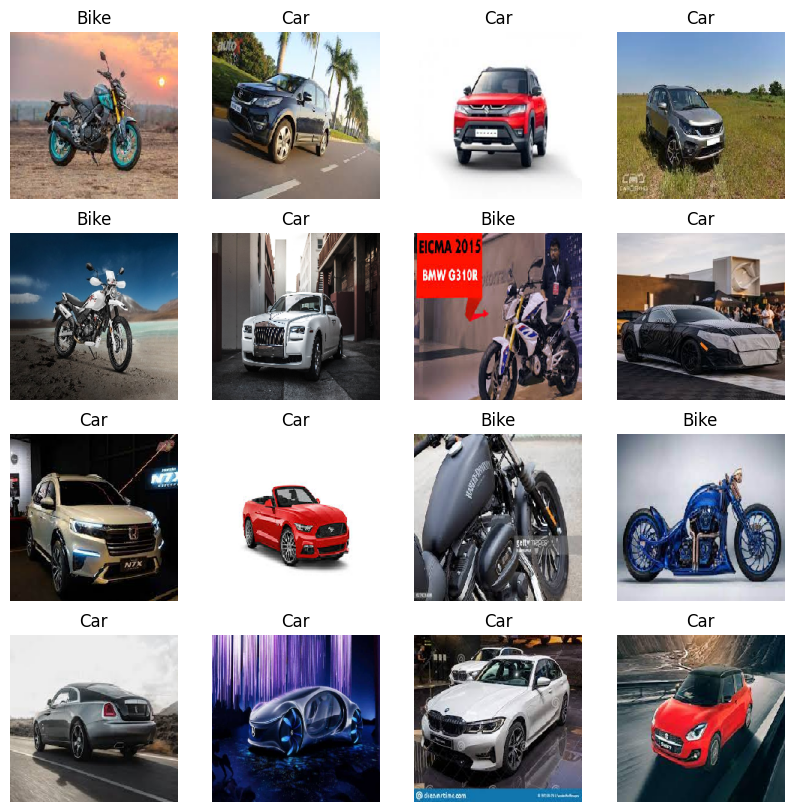

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get one batch of images and labels
images, labels = next(train_gen)

# Plot 16 images (4x4)
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title("Car" if labels[i] == 1 else "Bike")
    plt.axis('off')

plt.show()


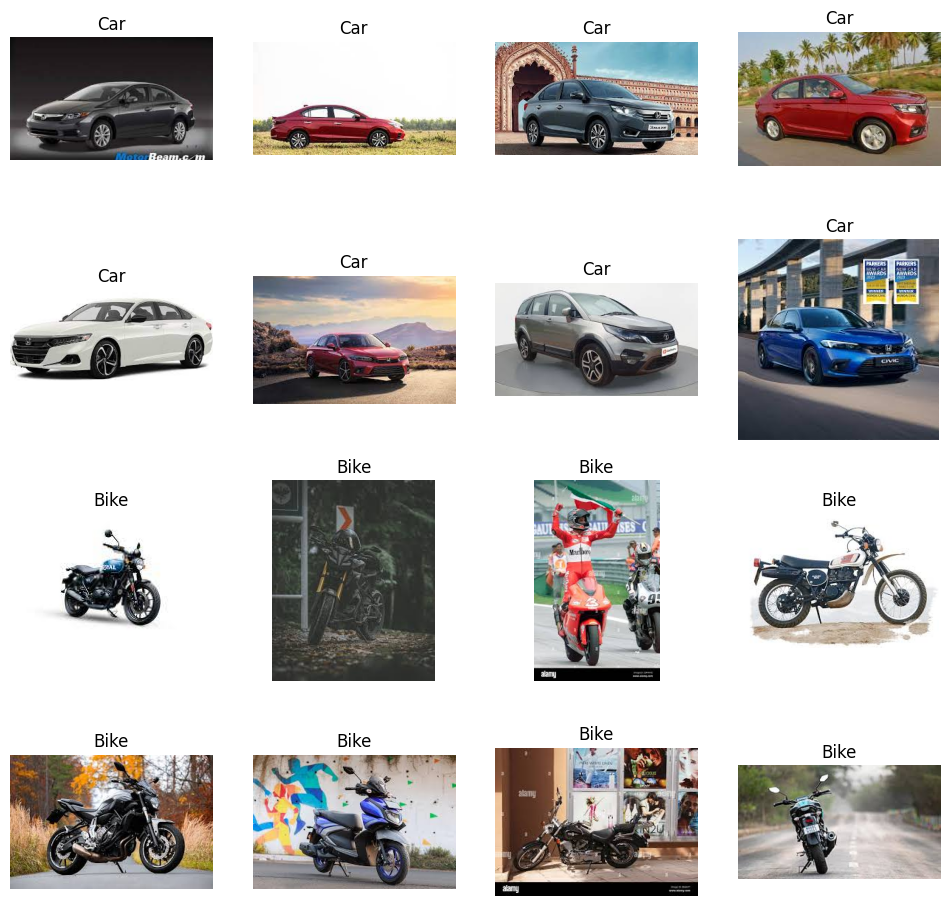

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# sets dataset paths again
base_dir = '/content/drive/MyDrive/CarBike/Car-Bike-Dataset'
car_dir = os.path.join(base_dir, 'Car')
bike_dir = os.path.join(base_dir, 'Bike')
# gets first 8 images from each folder
car_images = os.listdir(car_dir)[:8]
bike_images = os.listdir(bike_dir)[:8]
# creates path
all_images = [os.path.join(car_dir, img) for img in car_images] + \
             [os.path.join(bike_dir, img) for img in bike_images]
# creates 4x4 grid
plt.figure(figsize=(12,12))

for i, img_path in enumerate(all_images):
    plt.subplot(4, 4, i+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

    # Labels image using Car/Bike Folder
    label = os.path.basename(os.path.dirname(img_path))
    plt.title(label)

    plt.axis('off') #hides axis

plt.show()


In [ ]:
import tensorflow as tf
# Builds a simple CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),


    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary() #Summary of Model Canvas

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 917,665 (3.50 MB)

 Trainable params: 917,665 (3.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# Compiles Model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy']) #Tracks accuracy while training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Creates data generator with the validation split

train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2   # 20% validation split
)

validation_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)
# Loads training images
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/CarBike/Car-Bike-Dataset',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='training'
)

# Loads Validation Images
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/CarBike/Car-Bike-Dataset',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='validation'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.metrics import Precision, Recall

#  Implements model with precision + recall
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

#  Trains the model
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

# Calculate F1-score from the last epoch
precision = history.history['precision'][-1]
recall = history.history['recall'][-1]

f1_score = 2 * (precision * recall) / (precision + recall)
# Prints Scores
print("\nTraining Metrics:")
print(f"Accuracy:  {history.history['accuracy'][-1]:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")

# Best accuracy from 15 epoch was 86.0% (Before F1 scores)
# Training loss of 0.3626 which is good as lower the better
# Validation Accuracy 0.8867 Classifies 88.67% correctly as either car or bike. Which is good as its only just seen the images
# Validation Loss at 0.3737 which is slightly higher then the training loss, if the validation was higher then training loss that would mean the model is beginning to overfit
# overfitting(Memorises instead of learning) is when the model learns the data too well taking into consideration noise, mistakes and random information.


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 142s 13s/step - accuracy: 0.5166 - loss: 0.7032 - precision: 0.3983 - recall: 0.3256 - val_accuracy: 0.5273 - val_loss: 0.6781 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 7s/step - accuracy: 0.5174 - loss: 0.6829 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4531 - val_loss: 0.7143 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.5153 - loss: 0.6827 - precision: 0.3782 - recall: 0.1707 - val_accuracy: 0.7070 - val_loss: 0.6382 - val_precision: 0.8554 - val_recall: 0.5299
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7480 - loss: 0.6221 - precision: 0.8130 - recall: 0.5708 - val_accuracy: 0.7812 - val_loss: 0.5381 - val_precision: 0.7083 - val_recall: 1.0000
Epoch 5/15


/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.7162 - loss: 0.6028 - precision: 0.7154 - recall: 0.8241 - val_accuracy: 0.6523 - val_loss: 0.5688 - val_precision: 0.6000 - val_recall: 0.9925
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7240 - loss: 0.5267 - precision: 0.6910 - recall: 0.8531 - val_accuracy: 0.8125 - val_loss: 0.4161 - val_precision: 0.7794 - val_recall: 0.8548
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8494 - loss: 0.3503 - precision: 0.8325 - recall: 0.8799 - val_accuracy: 0.8789 - val_loss: 0.3053 - val_precision: 0.9062 - val_recall: 0.8593
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8580 - loss: 0.2977 - precision: 0.8374 - recall: 0.8984 - val_accuracy: 0.8750 - val_loss: 0.3538 - val_precision: 0.9500 - val_recall: 0.8636
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.7983 - loss: 0.3547 - precision: 0.8109 - recall: 0.7213 - val_accuracy: 0.9062 - val_loss: 0.2543 - val_precision: 0.8803 - 

In [ ]:
from google.colab import files
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for path in uploaded.keys():
    # Load and resize the image
    img = load_img(path, target_size=(224, 224))  # Resize the image to match the model
    x = img_to_array(img)
    x = x / 255.0  # Scales pixel value from 0-1
    x = np.expand_dims(x, axis=0)  # Add batch dimension

    # Predict
    classes = model.predict(x)
    print(f"Raw prediction: {classes[0]}")

    # Determine classes
    if classes[0] > 0.5:
        print(f"{path} is a **Car**")
    else:
        print(f"{path} is a **Bike**")

Saving jiueie.jpg to jiueie.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Raw prediction: [0.00251049]
jiueie.jpg is a **Bike**
